In [28]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas

## Data importing and preprocessing

In [21]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

## Directed Weighted Network Creation

In [7]:
# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

graphs = []
passengers = []   # records number of total passengers(month wise)
lbls = []
for i in excel_list:
    path = "Raw_Data/"+i
    excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
    passengers.append(sum(excel["to"]) + sum(excel["from"]))
    lbls.append(i[:-4])
    G = nx.DiGraph()
    cities = {}
    for i in range(1,len(excel)+1):
        cities[excel["city1"][i]] = (coordinates["Longitude"][excel["city1"][i]],coordinates["Latitude"][excel["city1"][i]])
        cities[excel["city2"][i]] = (coordinates["Longitude"][excel["city2"][i]],coordinates["Latitude"][excel["city2"][i]])
    for i in cities:
        G.add_node(i, pos= cities[i])
    
    print(path)
    for i in range(1,len(excel)+1):
        weight1 = excel["to"][i]
        if(weight1 != 0):
            G.add_edge(excel["city1"][i],excel["city2"][i],weight=weight1)
        weight2 = excel["from"][i]
        if(weight2 != 0):
            G.add_edge(excel["city2"][i],excel["city1"][i],weight=weight2)
    graphs.append(G)
nx.write_gml(graphs[-7], "test.gml", stringizer = str)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[119 rows x 2 columns]
Raw_Data/1505.csv
Raw_Data/1506.csv
Raw_Data/1507.csv
Raw_Data/1508.csv
Raw_Data/1509.csv
Raw_Data/1510.csv
Raw_Data/1511.csv
Raw_Data/1512.csv
Raw_Data/1601.csv
Raw_Data/1602.csv
Raw_Data/1603.csv
Raw_Data/1604.csv
Raw_Data/1605.csv
Raw_Data/1606.csv
Raw_Data/1607.csv
Raw_Data/1608.csv
Raw_Data/1609.csv
Raw_Data/1610.csv
Raw_Data/1611.csv
Raw_Data/1612.csv
Raw_Data/1701.csv
Raw_Data/1702.csv
Raw_Data/1703.csv
Raw_Data/1704.csv
Raw_Data/1705.csv
Raw_Data/1706.csv
Raw_Data/1707.csv
Raw_Data/1708.csv
Raw_Data/1709.csv

In [38]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

<AxesSubplot:>

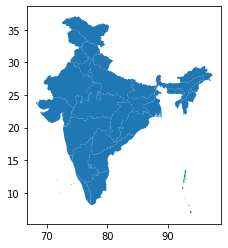

In [43]:
# coordinates has city, lat, long -> <class 'pandas.core.frame.DataFrame'>

import geopandas
df = geopandas.read_file("shapefile/india_states.shp")
df.plot()

# for i in range(len(lbls)):
#     print(i)
#     nx.draw_networkx(graphs[i],nx.get_node_attributes(graphs[i],'pos'))
#     figure = plt.gcf()
#     figure.set_size_inches(30, 30)
#     plt.title("Airport Network Of India "+ lbls1[i])
# #     plt.savefig('Output_Files/matplotlib/map'+lbls[i])
#     plt.plot()
#     plt.clf()
#     break

# print(len(lbls), len(lbls1))
for i in range(len(lbls)):
    print(i)
    nx.draw_networkx(graphs[i],nx.get_node_attributes(graphs[i],'pos'))
#     nx.write_gml(graphs[i], "test.gml", stringizer = str)
    figure = plt.gcf()
    figure.set_size_inches(30, 30)
    plt.title("Airport Network Of India "+ lbls1[i])
    plt.savefig('Output_Files/matplotlib/map'+lbls[i])
    plt.clf()

## Network Visualization

['1505', '1506', '1507', '1508', '1509', '1510', '1511', '1512', '1601', '1602', '1603', '1604', '1605', '1606', '1607', '1608', '1609', '1610', '1611', '1612', '1701', '1702', '1703', '1704', '1705', '1706', '1707', '1708', '1709', '1710', '1711', '1712', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010']


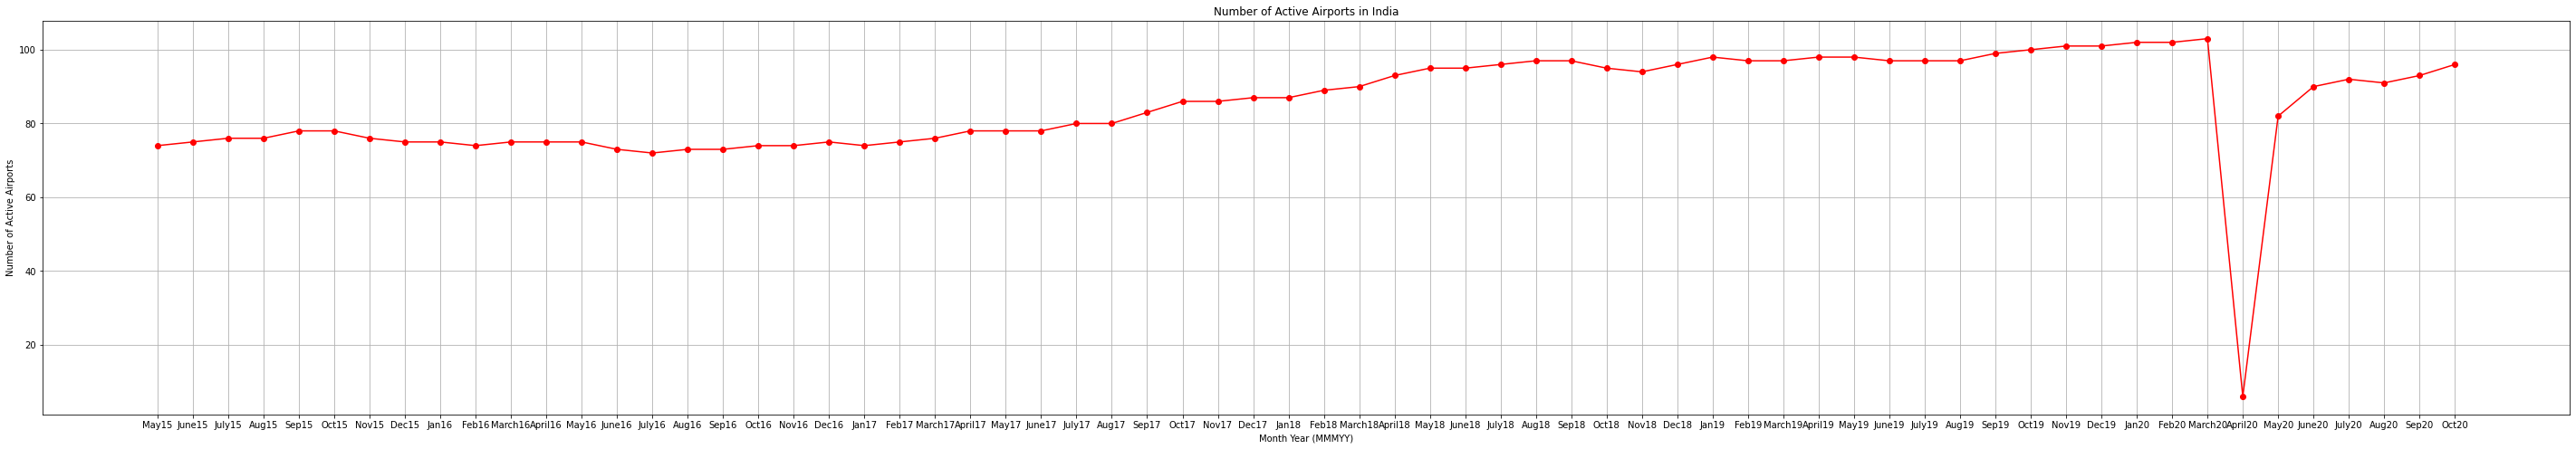

In [5]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))
print(lbls)
plt.plot(nodes, color="red", marker="o")
plt.xlabel("Month Year (MMMYY)")

plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
plt.grid(True)

figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/nodes')
plt.show()

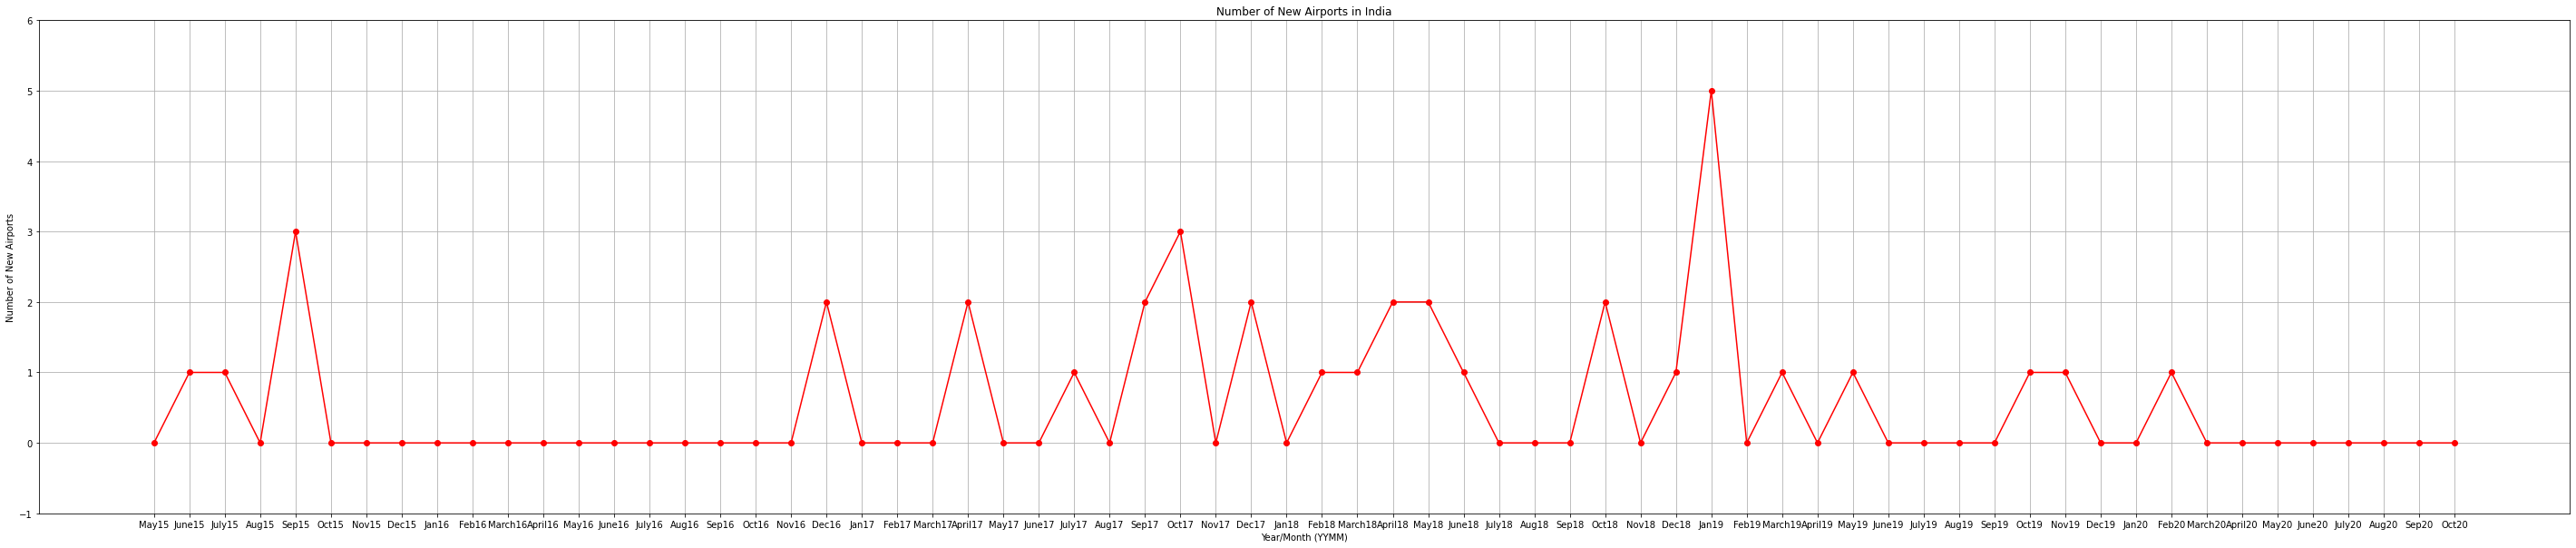

In [6]:
nnodes = []
airpor = {} 
for i in range(len(graphs)):
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
    nnodes.append(temp)
nnodes[0] = 0
plt.plot(nnodes, color="red", marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/newnodes')
plt.show()

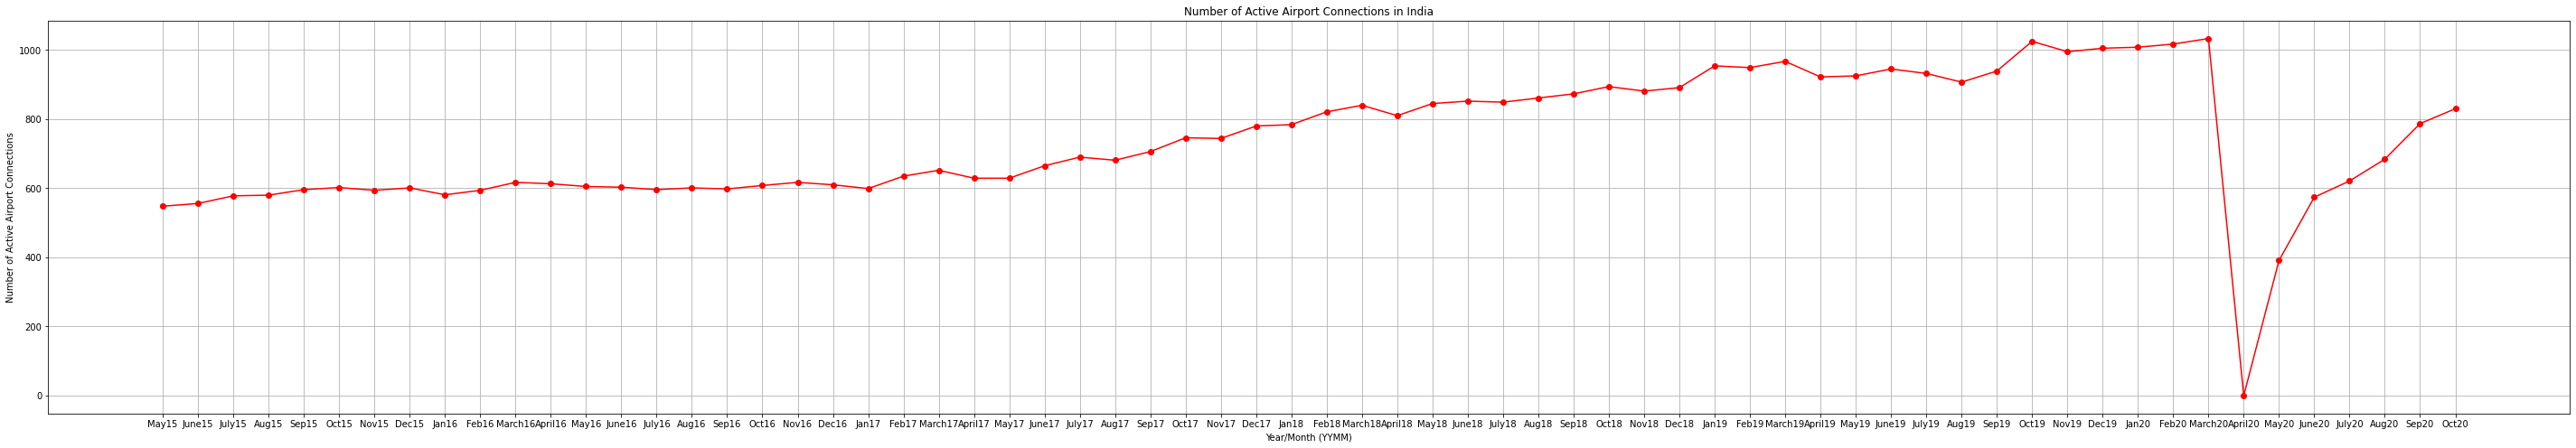

In [7]:
edges = []
for i in range(len(graphs)):
    edges.append(len(graphs[i].edges()))
plt.plot(edges, color="red", marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)], labels = lbls1)
plt.ylabel("Number of Active Airport Connections")
plt.title("Number of Active Airport Connections in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/edges')
plt.show()

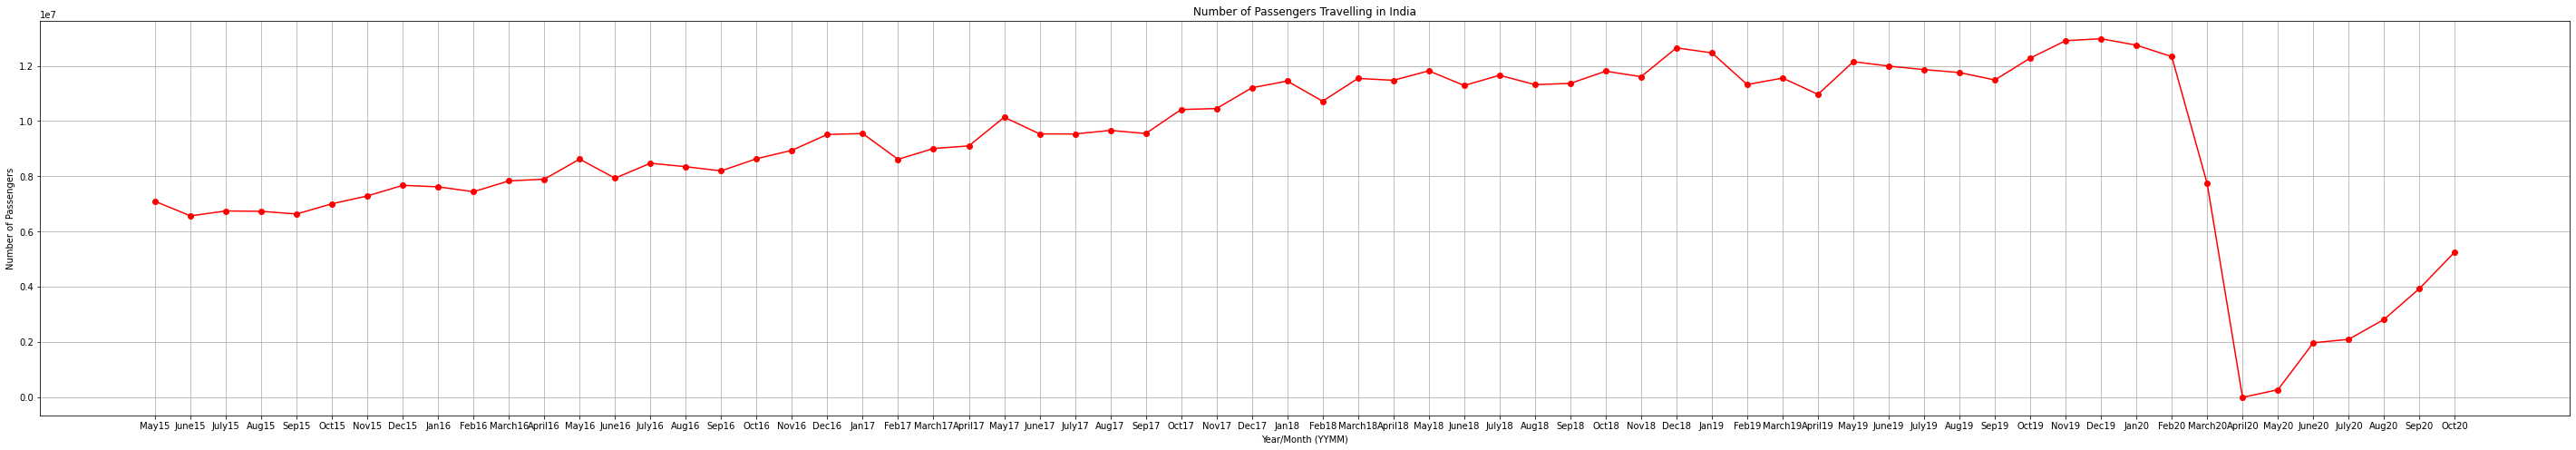

In [8]:
plt.plot(passengers, color="red",  marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)],labels = lbls1)
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Travelling in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/passengers')
plt.show()

In [9]:
for i in sorted(airpor.keys()):
    print(i)

ADAMPUR
AGARTALA
AGATTI ISLAND
AGRA
AHMEDABAD
AIZAWL
AJMER
ALLAHABAD
AMRITSAR
AURANGABAD
BAGDOGRA
BELGAUM
BENGALURU
BHATINDA
BHAVNAGAR
BHOPAL
BHUBANESWAR
BHUJ
BIDAR AIRPORT, KARNATAKA
BIKANER
CHANDIGARH
CHENNAI
COCHIN
COIMBATORE
CUDDAPAH
DABOLIM
DEHRA DUN
DELHI
DHARAMSALA
DIBRUGARH
DIMAPUR
DIU
DURGAPUR
GANGTOK
GAYA
GHAZIABAD
GOA
GORAKHPUR
GUWAHATI
GWALIOR
HUBLI
HYDERABAD
IMPHAL
INDORE
JABALPUR
JAGDALPUR
JAIPUR
JAISALMER
JALGAON
JAMMU
JAMNAGAR
JHARSUGUDA
JODHPUR
JORHAT
Jharsuguda
KADAPA
KALABURAGI, KARNATAKA
KANDLA
KANNUR
KANPUR
KHAJURAHO
KOCHI
KOLHAPUR
KOLKATA
KOZHIKODE
KULLU
LEH
LILABARI
LUCKNOW
LUDHIANA
MADURAI
MANGALORE
MUMBAI
MUNDRA
MYSORE
NAGPUR
NANDED
NASIK
PAKYONG
PANTNAGAR
PASIGHAT
PATHANKOT
PATNA
PITHORAGARH
PONDICHERRY
PORBANDAR
PORT BLAIR
PUDUCHERRY
PUNE
RAIPUR
RAJAHMUNDRY
RAJKOT
RANCHI
SALEM
SHILLONG
SHIRDI
SILCHAR
SIMLA
SRINAGAR
SURAT
TEZPUR
TIRUCHIRAPALLY
TIRUPATI
TRIVANDRUM
TUTICORIN
UDAIPUR
VADODARA
VARANASI
VIDYANAGAR
VIJAYAWADA
VISAKHAPATNAM


excel = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0)
tempcity = list(excel["Cities"])
#print(tempcity)
for i in sorted(airpor.keys()):
    if i not in tempcity:
        print(i)

In [10]:
for i in range(len(graphs)):
    print(lbls1[i])
    G = graphs[i]
    betweenness_dict = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

#     sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("Top 10 nodes")
    
    for i in range(len(sorted_betweenness[:10])):
        print(sorted_betweenness[i][0] + " -> " + str(sorted_betweenness[i][1]))


May15
Top 10 nodes
DELHI -> 0.35088642067808723
MUMBAI -> 0.2462499554394531
KOLKATA -> 0.14229527765486671
BENGALURU -> 0.12847787254179963
CHENNAI -> 0.09071295217128547
GUWAHATI -> 0.06162531447919573
HYDERABAD -> 0.04865761880602063
KOCHI -> 0.0279885766187136
SILCHAR -> 0.0273972602739726
AHMEDABAD -> 0.00892063262925135
June15
Top 10 nodes
DELHI -> 0.347284328962411
MUMBAI -> 0.240014704227033
BENGALURU -> 0.15818270955257266
KOLKATA -> 0.13654468757208485
CHENNAI -> 0.08676250833785078
GUWAHATI -> 0.06227147168927988
HYDERABAD -> 0.04598120625517885
KOCHI -> 0.02760236184893719
SILCHAR -> 0.02702702702702703
AHMEDABAD -> 0.008529895687429935
July15
Top 10 nodes
DELHI -> 0.33858513183513167
MUMBAI -> 0.22533362558362557
BENGALURU -> 0.16823499273499282
KOLKATA -> 0.13308620958620956
CHENNAI -> 0.08914823564823564
GUWAHATI -> 0.061061578061578047
HYDERABAD -> 0.04735814210814211
KOCHI -> 0.028210214210214208
SILCHAR -> 0.02666666666666667
VARANASI -> 0.018153796653796652
Aug15
Top

Top 10 nodes
DELHI -> 0.3955517319526769
MUMBAI -> 0.205675523648229
HYDERABAD -> 0.12224674423390831
CHENNAI -> 0.10625072838618713
KOLKATA -> 0.07437406748526243
BENGALURU -> 0.06364150666148086
GUWAHATI -> 0.05719715227316951
KOCHI -> 0.025278338608170532
KHAJURAHO -> 0.011764705882352938
JAIPUR -> 0.009601869108171623
Dec17
Top 10 nodes
DELHI -> 0.35002007844018346
MUMBAI -> 0.25020793068126856
HYDERABAD -> 0.12484502893031335
CHENNAI -> 0.10313775018330155
KOLKATA -> 0.07199720093489176
GUWAHATI -> 0.05731374670657452
BENGALURU -> 0.04607147873027981
KOCHI -> 0.025606174111646063
JAIPUR -> 0.018895047421039222
PUNE -> 0.011012578884148852
Jan18
Top 10 nodes
DELHI -> 0.35661368891160883
MUMBAI -> 0.24590295145829463
HYDERABAD -> 0.11026321216179988
CHENNAI -> 0.10617699025088183
KOLKATA -> 0.07190650466099088
GUWAHATI -> 0.05760707892065016
BENGALURU -> 0.0549940729227766
KOCHI -> 0.025605655933973303
JAIPUR -> 0.02348658181763516
PUNE -> 0.009719765718397727
Feb18
Top 10 nodes
DEL

Top 10 nodes
DELHI -> 0.29510150045322
MUMBAI -> 0.18616953327197938
BENGALURU -> 0.1269805307370882
KOLKATA -> 0.11702156327469851
HYDERABAD -> 0.10889042522381517
CHENNAI -> 0.06839940235293383
AHMEDABAD -> 0.04854809431376554
GUWAHATI -> 0.03043069431189349
JAIPUR -> 0.025278222821463976
DEHRA DUN -> 0.023356598806004627
Jan20
Top 10 nodes
DELHI -> 0.29760778777877034
MUMBAI -> 0.16986625176670753
BENGALURU -> 0.12167532491877861
HYDERABAD -> 0.10899352729986823
KOLKATA -> 0.09063959353321241
AHMEDABAD -> 0.0829694873052305
CHENNAI -> 0.0747925616293193
GUWAHATI -> 0.05682827189373237
DEHRA DUN -> 0.022874612855597127
JAIPUR -> 0.022685307897305558
Feb20
Top 10 nodes
DELHI -> 0.2977038444480793
MUMBAI -> 0.1871189380113593
BENGALURU -> 0.14552882628665992
HYDERABAD -> 0.10748381738933742
KOLKATA -> 0.08981769998771927
CHENNAI -> 0.06561872431474068
GUWAHATI -> 0.052746696907618865
AHMEDABAD -> 0.050008611431410395
DEHRA DUN -> 0.023016893864756534
JAIPUR -> 0.022851044155594545
Marc

Degree Distribution

May15
Top 10 nodes
DELHI -> 107
MUMBAI -> 92
BENGALURU -> 76
KOLKATA -> 66
CHENNAI -> 60
HYDERABAD -> 54
AHMEDABAD -> 35
GUWAHATI -> 32
INDORE -> 27
PUNE -> 27


June15
Top 10 nodes
DELHI -> 107
MUMBAI -> 92
BENGALURU -> 80
KOLKATA -> 65
CHENNAI -> 60
HYDERABAD -> 54
AHMEDABAD -> 35
GUWAHATI -> 34
INDORE -> 28
GOA -> 27


July15
Top 10 nodes
DELHI -> 107
MUMBAI -> 92
BENGALURU -> 85
KOLKATA -> 65
CHENNAI -> 62
HYDERABAD -> 61
GUWAHATI -> 34
AHMEDABAD -> 33
INDORE -> 28
PUNE -> 27


Aug15
Top 10 nodes
DELHI -> 108
MUMBAI -> 92
BENGALURU -> 85
KOLKATA -> 66
HYDERABAD -> 61
CHENNAI -> 60
GUWAHATI -> 34
AHMEDABAD -> 33
INDORE -> 28
PUNE -> 28


Sep15
Top 10 nodes
DELHI -> 110
MUMBAI -> 95
BENGALURU -> 89
KOLKATA -> 73
HYDERABAD -> 61
CHENNAI -> 60
GUWAHATI -> 34
AHMEDABAD -> 33
GOA -> 29
INDORE -> 28


Oct15
Top 10 nodes
DELHI -> 112
MUMBAI -> 94
BENGALURU -> 87
KOLKATA -> 72
CHENNAI -> 62
HYDERABAD -> 61
AHMEDABAD -> 37
GUWAHATI -> 34
PUNE -> 30
GOA -> 28


Nov15
Top 10 nodes
DELHI -> 111

c:\users\juhi pandey\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]




Feb17
Top 10 nodes
DELHI -> 119
MUMBAI -> 94
BENGALURU -> 83
KOLKATA -> 72
HYDERABAD -> 67
CHENNAI -> 62
GUWAHATI -> 41
PUNE -> 34
AHMEDABAD -> 33
GOA -> 30


March17
Top 10 nodes
DELHI -> 121
MUMBAI -> 94
BENGALURU -> 82
KOLKATA -> 74
HYDERABAD -> 67
CHENNAI -> 61
GUWAHATI -> 41
AHMEDABAD -> 36
GOA -> 34
PUNE -> 34


April17
Top 10 nodes
DELHI -> 120
MUMBAI -> 91
BENGALURU -> 77
KOLKATA -> 76
HYDERABAD -> 69
CHENNAI -> 61
GUWAHATI -> 39
AHMEDABAD -> 36
PUNE -> 31
JAIPUR -> 30


May17
Top 10 nodes
DELHI -> 120
MUMBAI -> 93
BENGALURU -> 82
KOLKATA -> 76
HYDERABAD -> 70
CHENNAI -> 60
GUWAHATI -> 39
AHMEDABAD -> 35
PUNE -> 31
GOA -> 27


June17
Top 10 nodes
DELHI -> 122
MUMBAI -> 91
BENGALURU -> 84
HYDERABAD -> 75
KOLKATA -> 75
CHENNAI -> 62
GUWAHATI -> 40
AHMEDABAD -> 38
PUNE -> 34
GOA -> 33


July17
Top 10 nodes
DELHI -> 122
MUMBAI -> 97
BENGALURU -> 80
HYDERABAD -> 75
KOLKATA -> 74
CHENNAI -> 63
GUWAHATI -> 40
AHMEDABAD -> 38
JAIPUR -> 35
GOA -> 34


Aug17
Top 10 nodes
DELHI -> 119
M

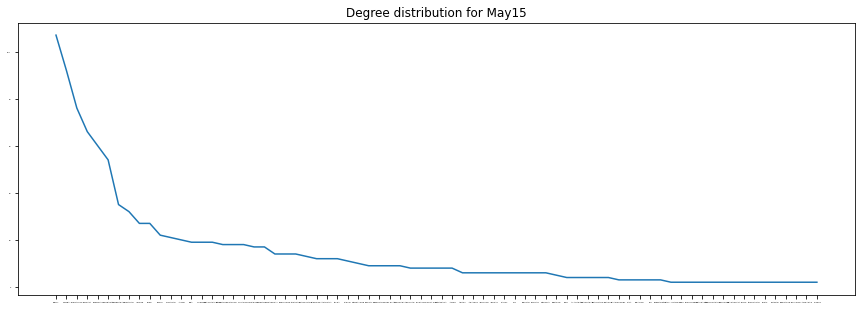

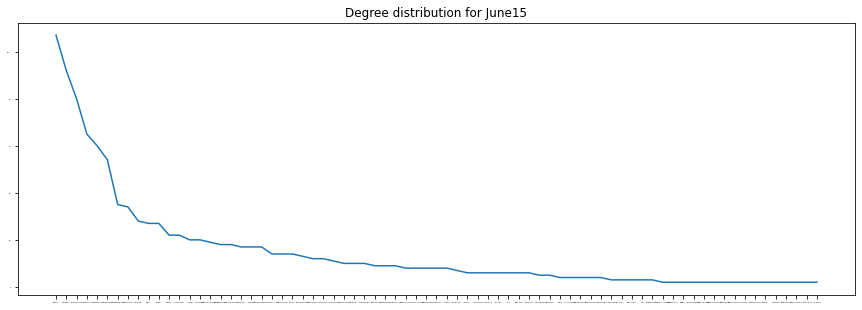

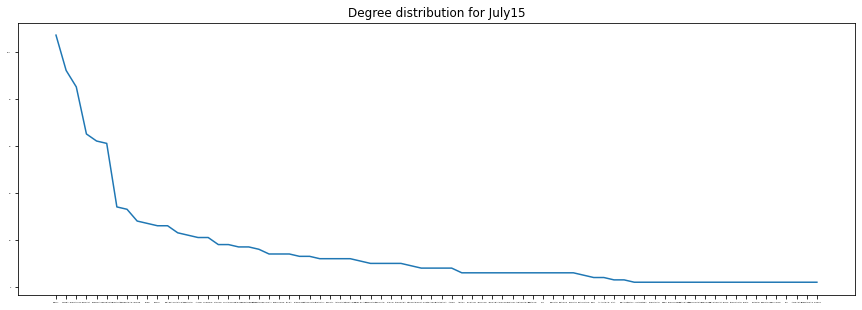

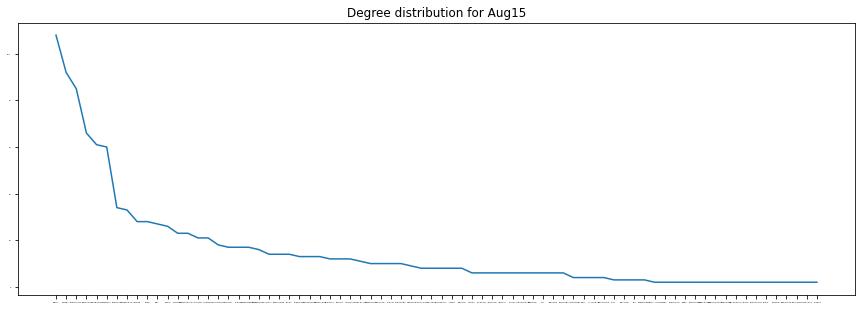

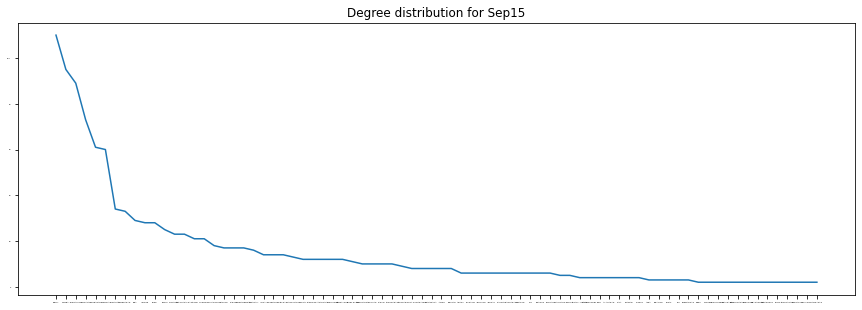

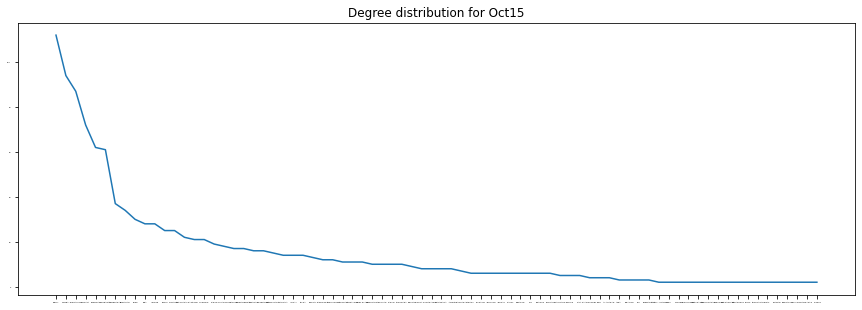

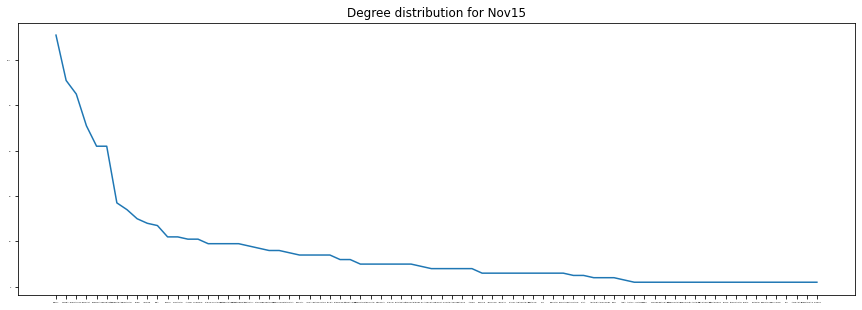

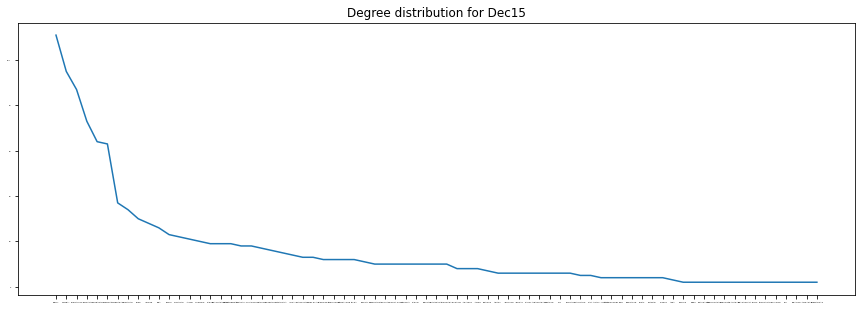

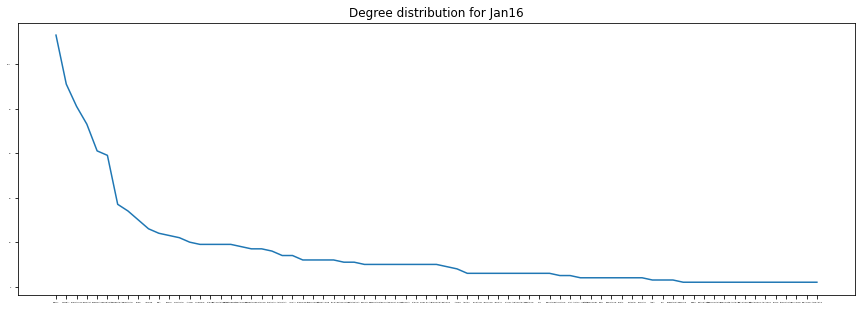

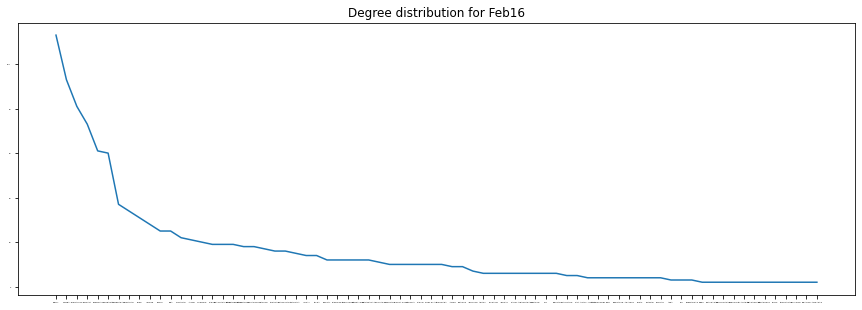

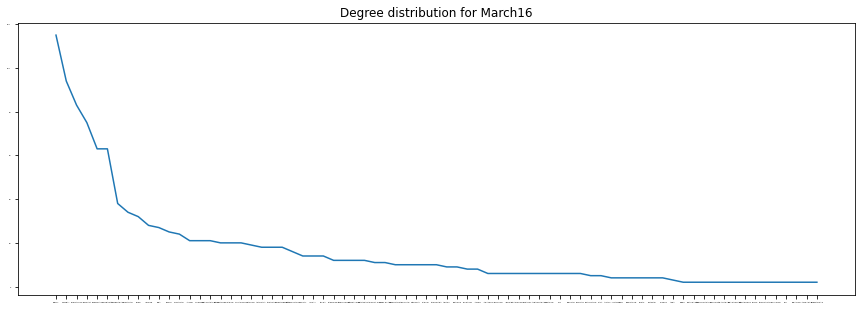

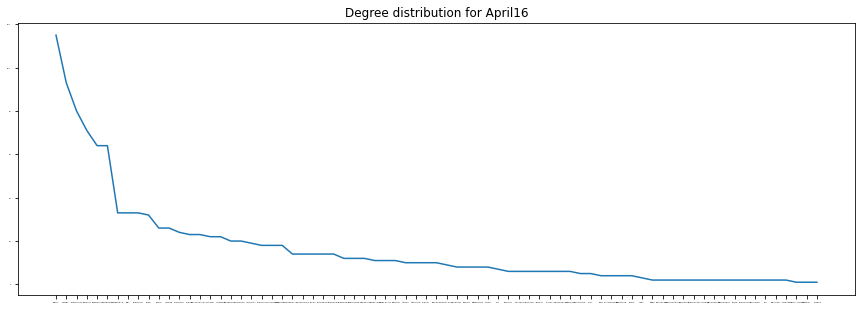

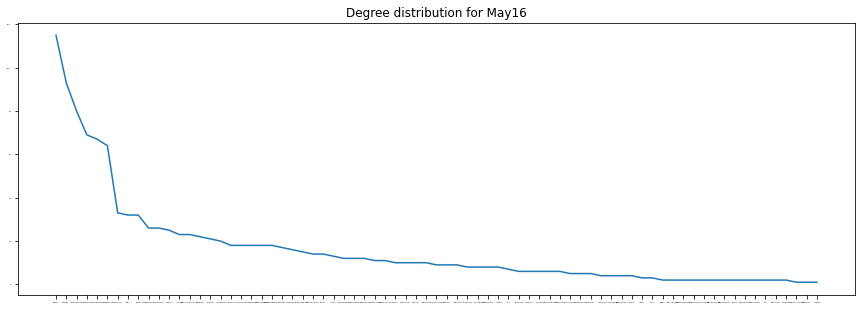

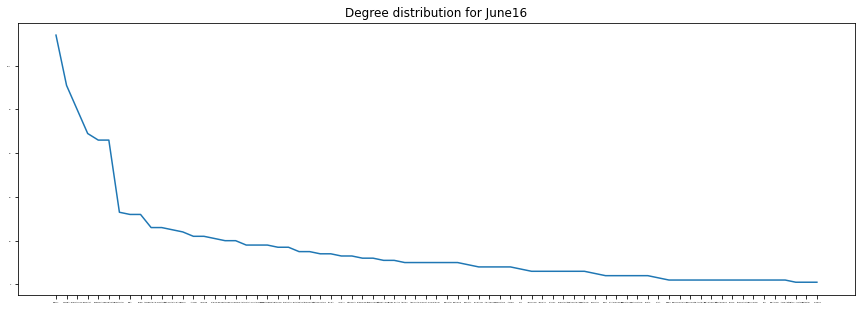

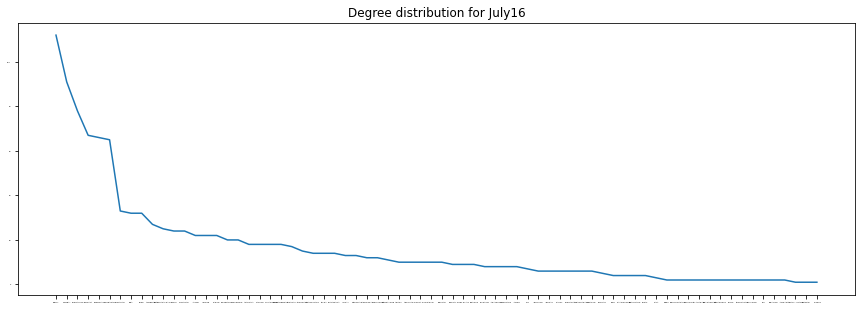

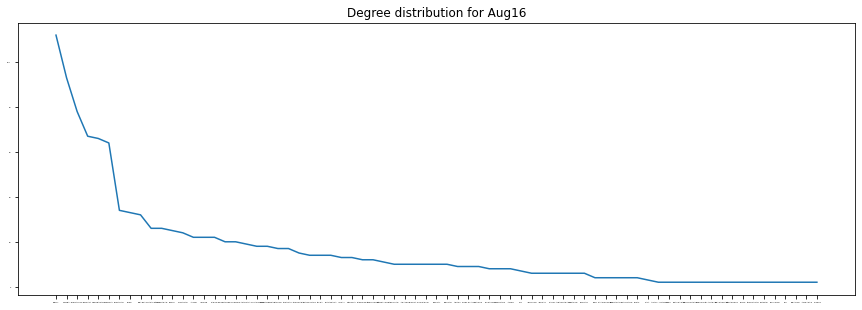

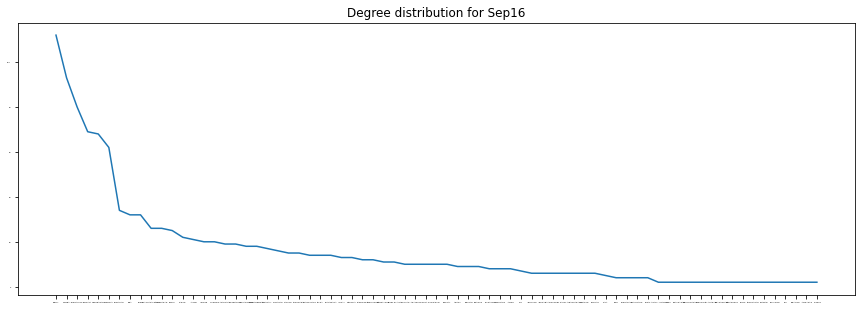

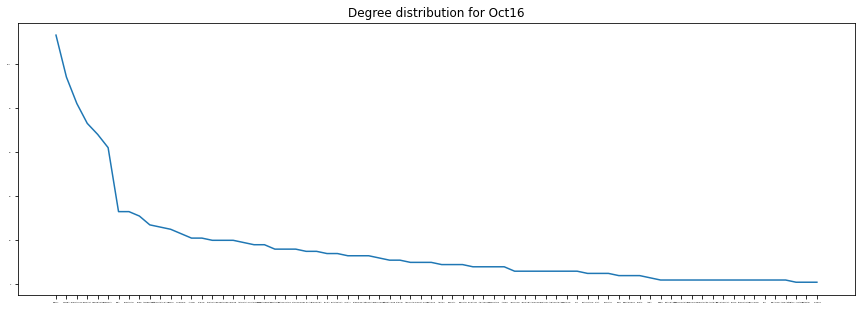

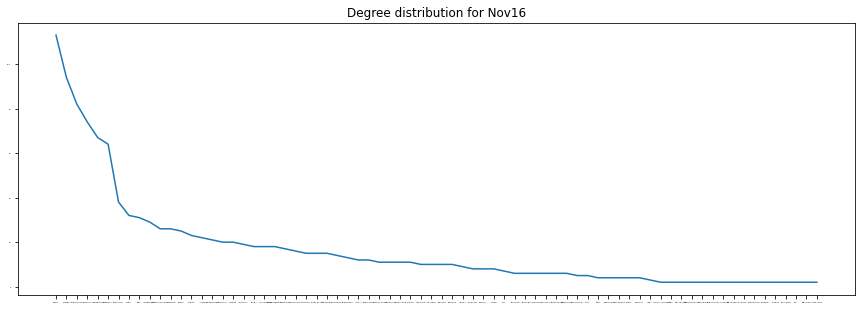

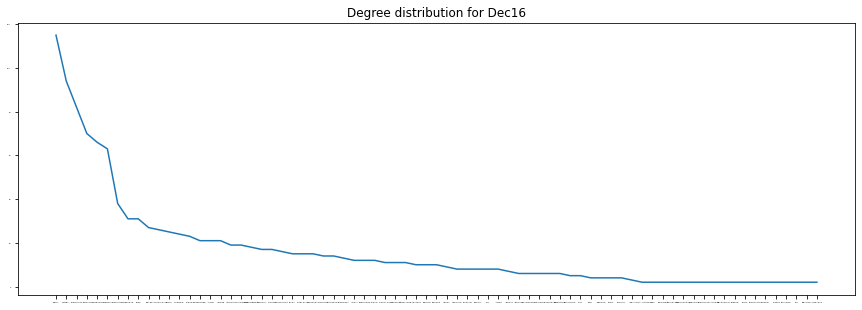

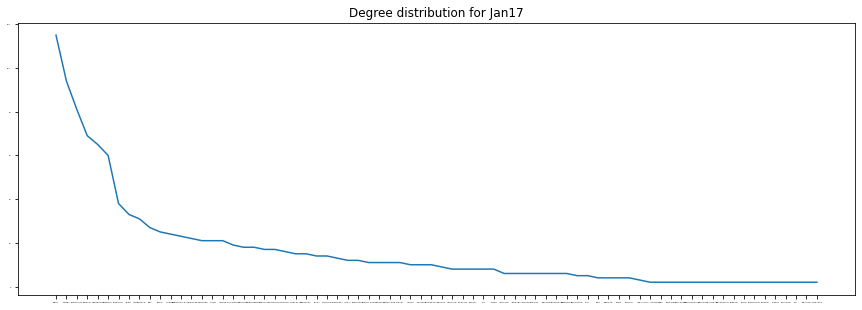

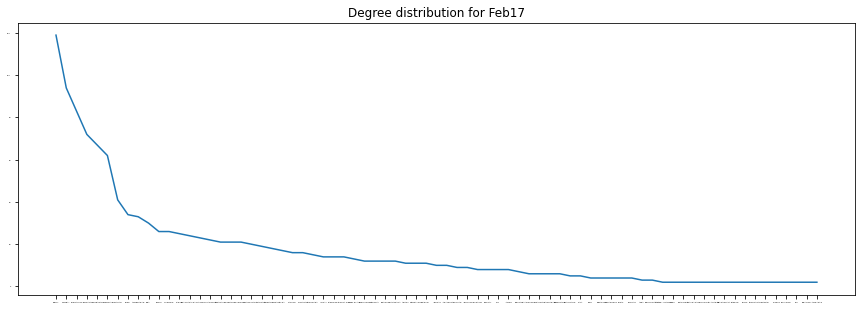

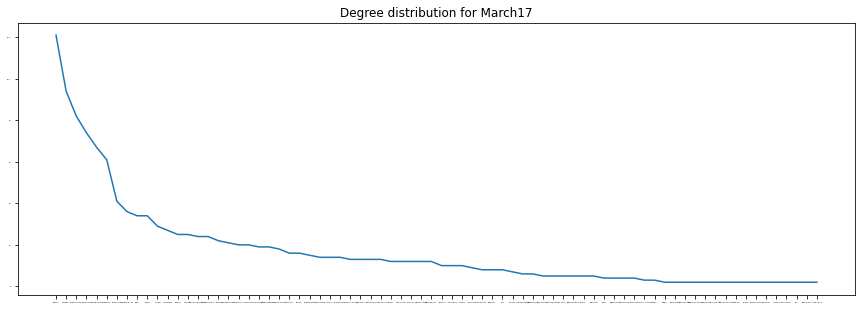

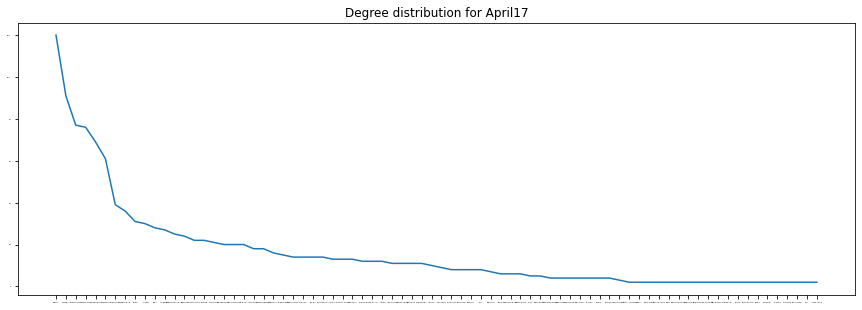

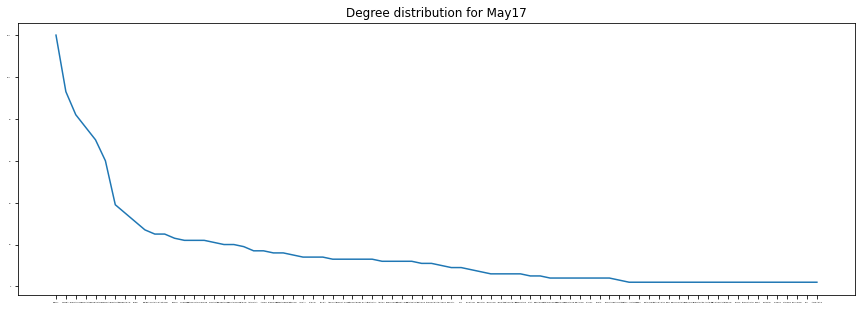

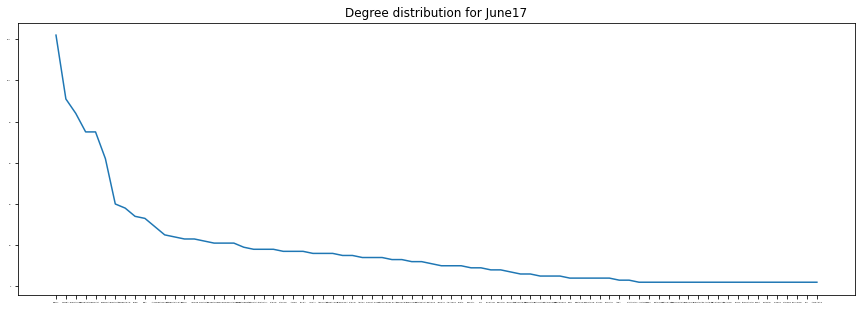

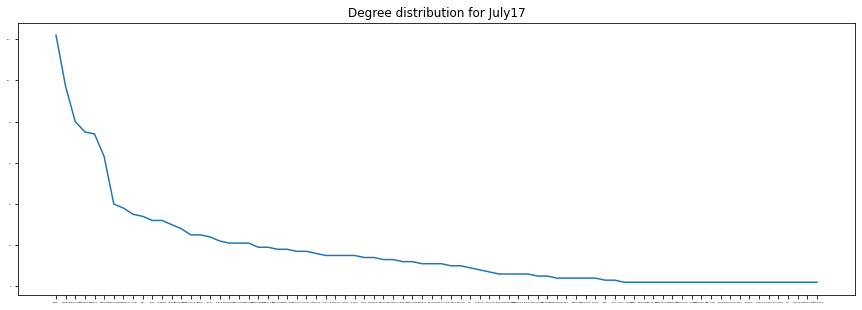

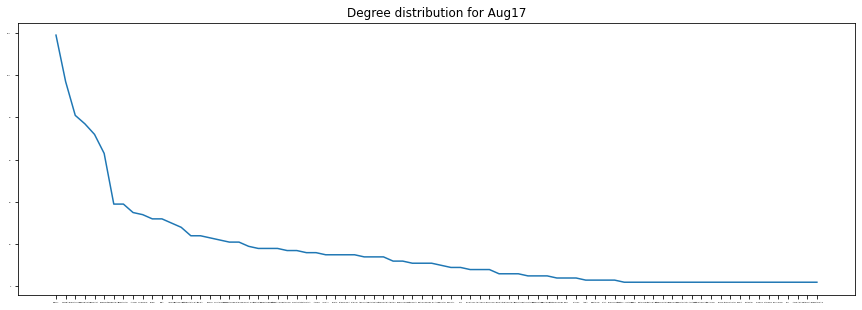

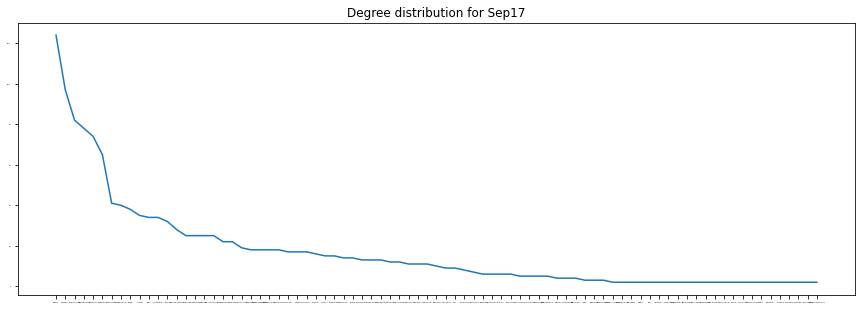

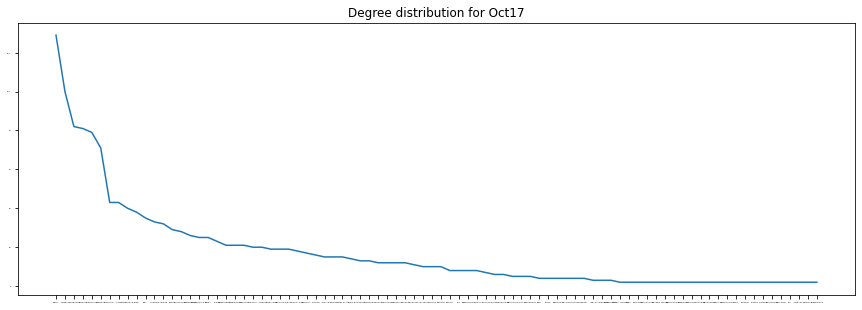

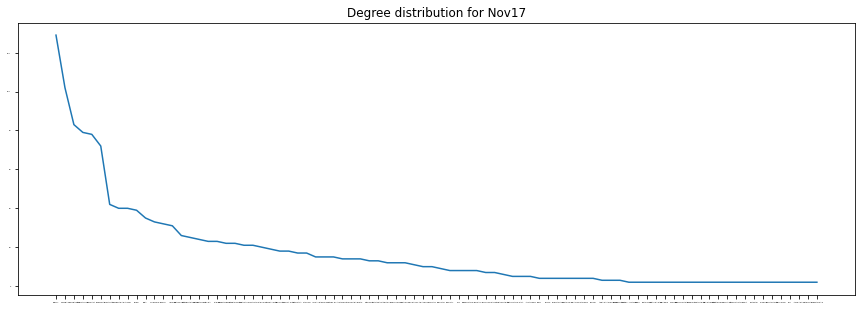

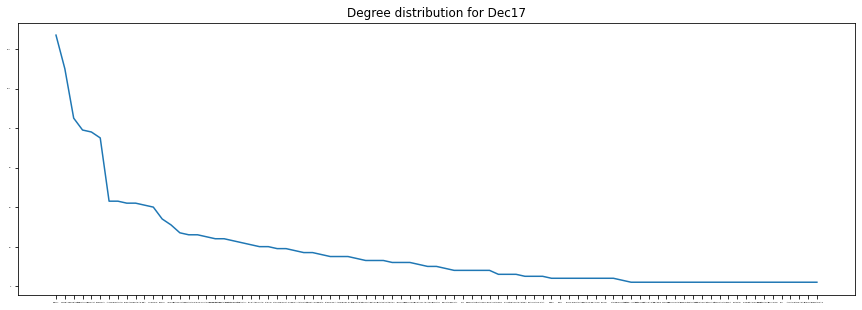

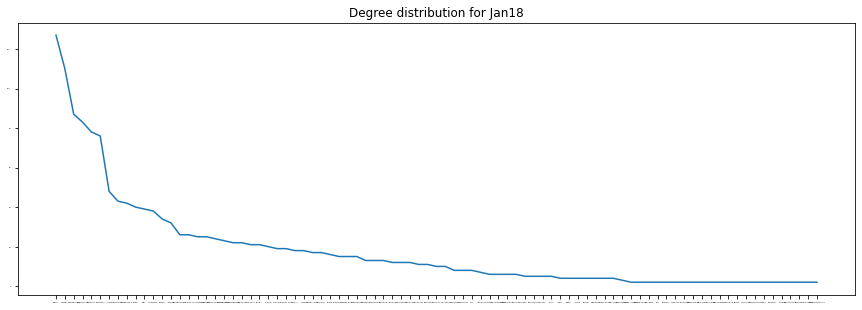

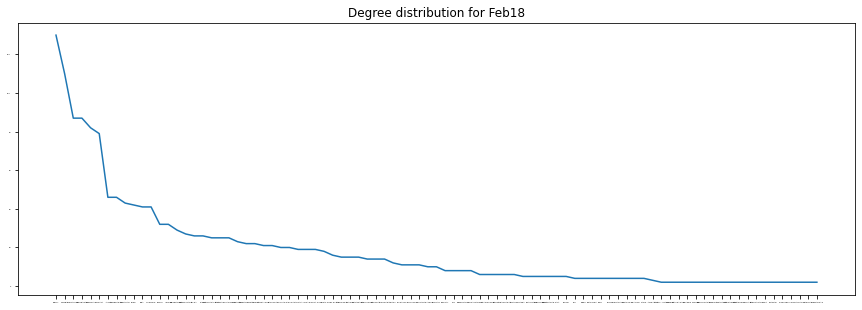

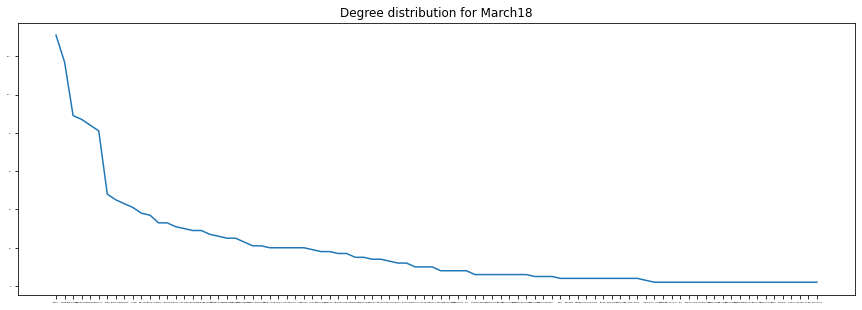

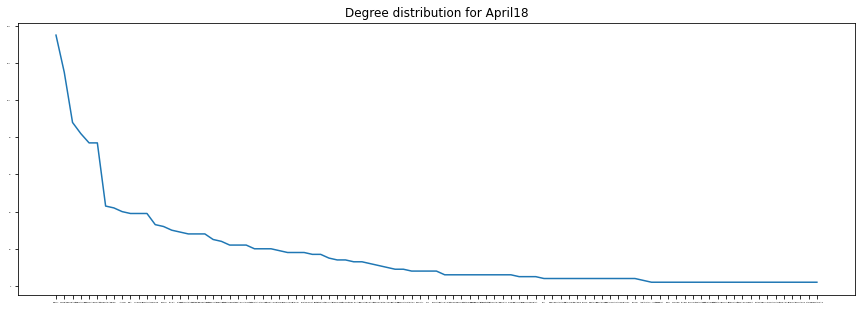

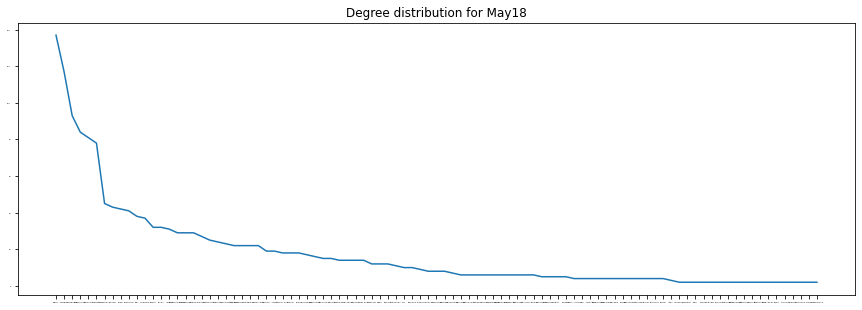

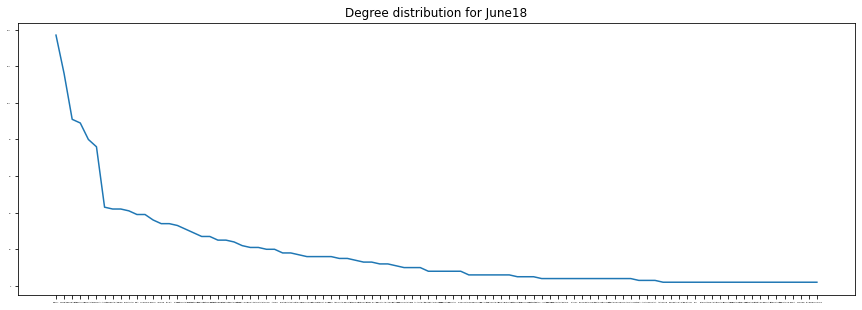

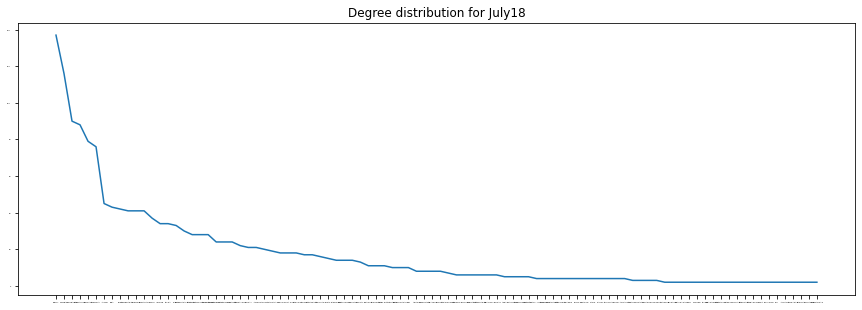

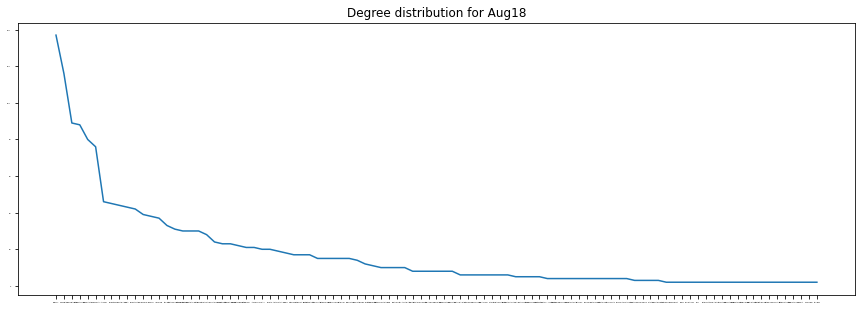

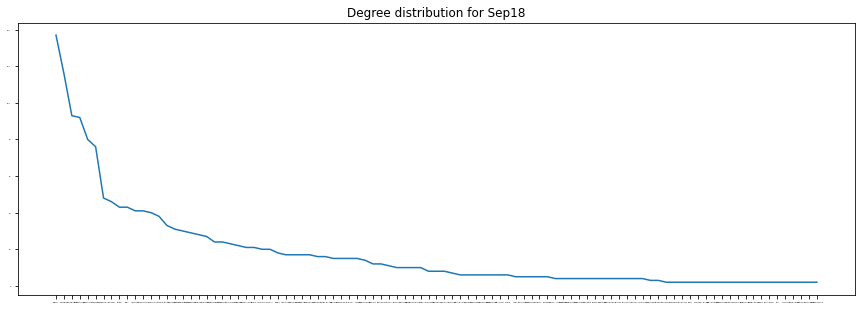

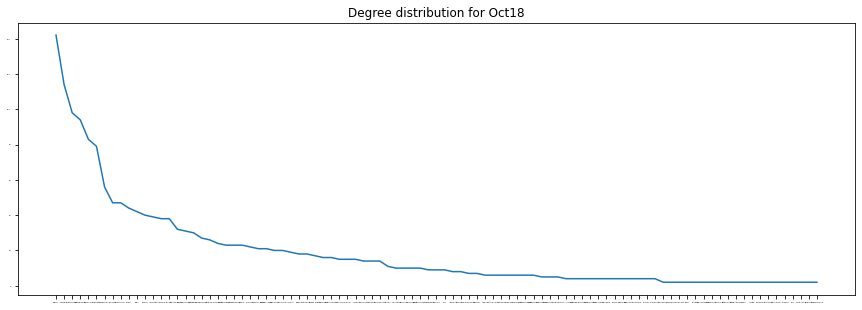

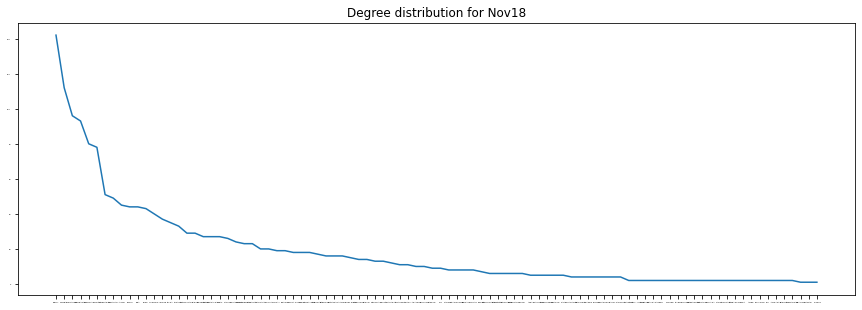

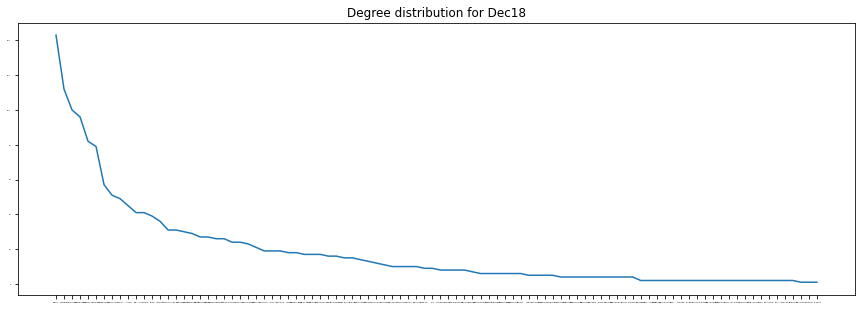

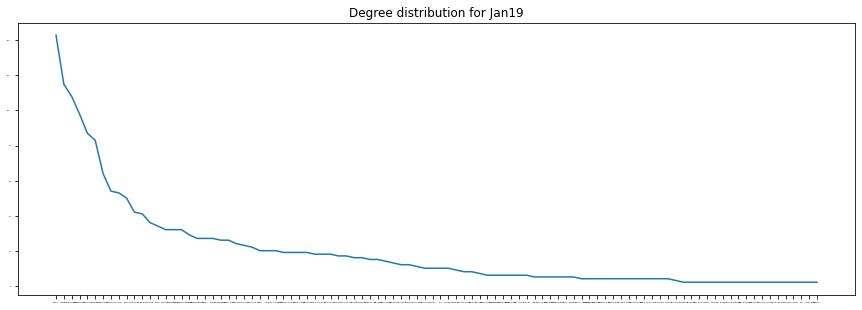

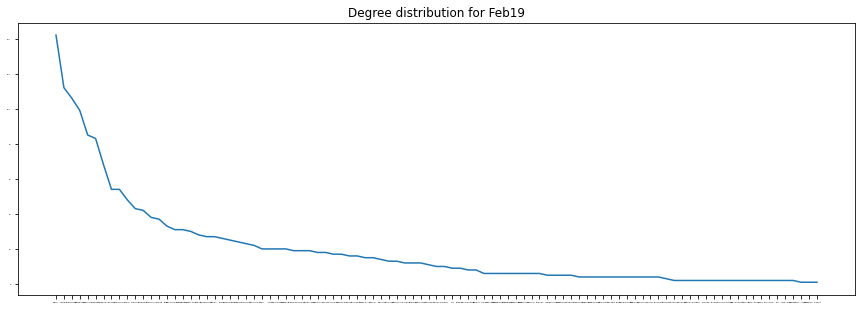

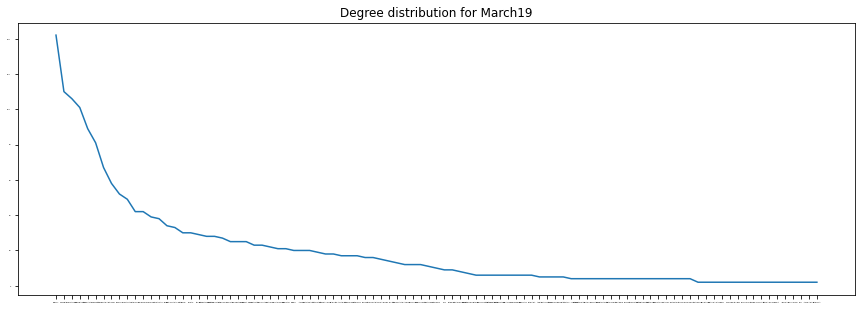

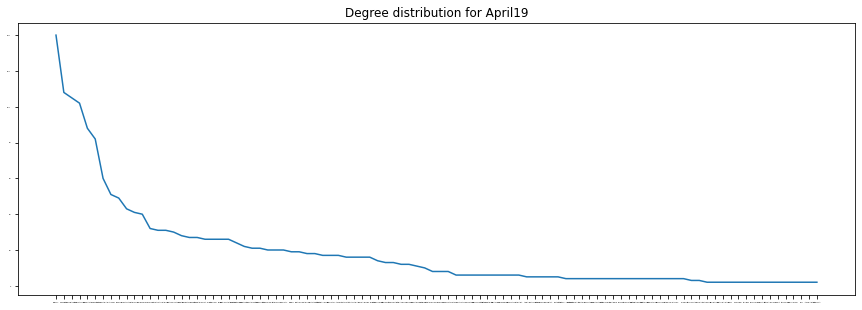

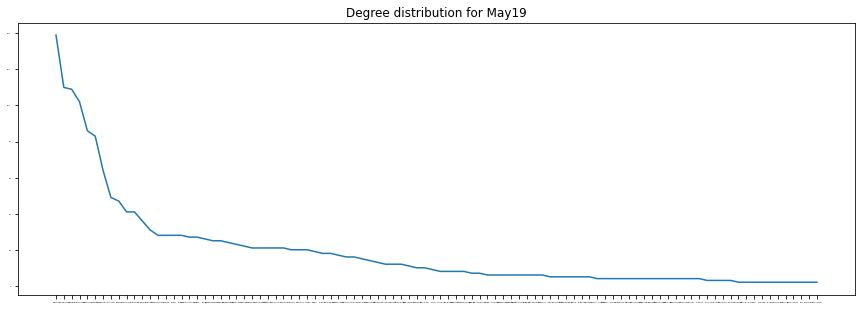

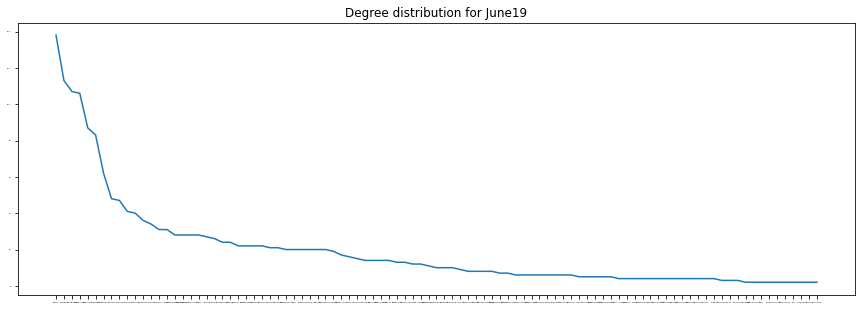

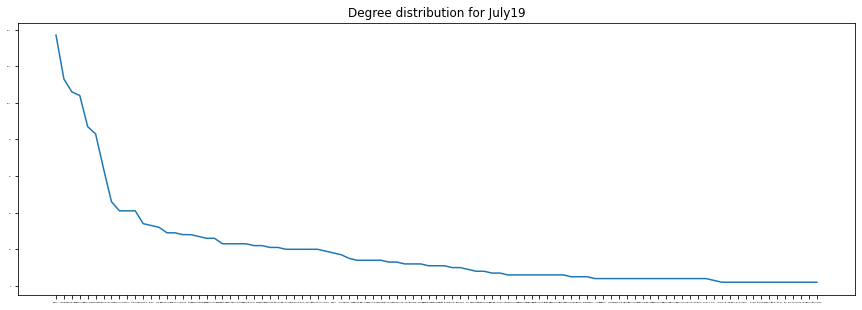

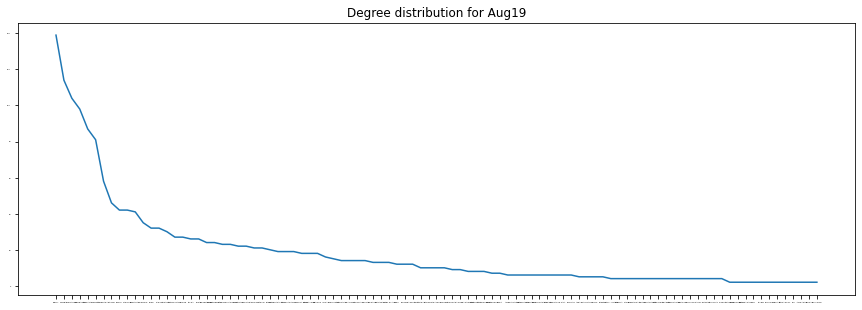

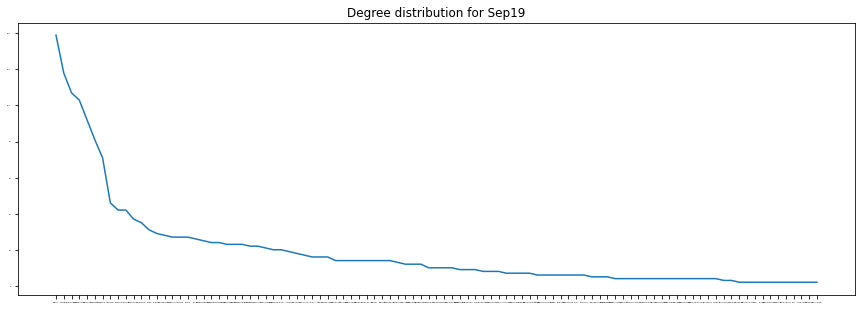

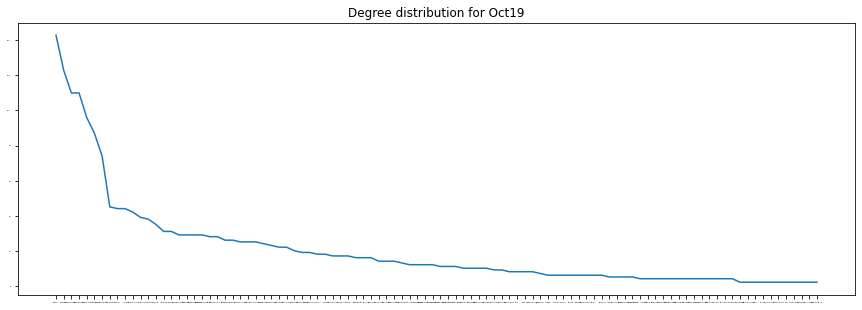

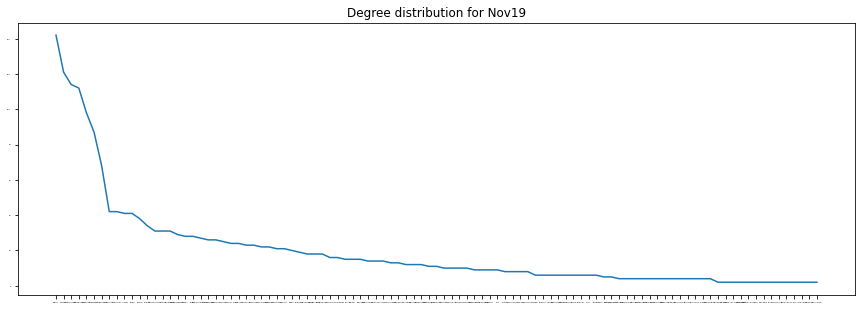

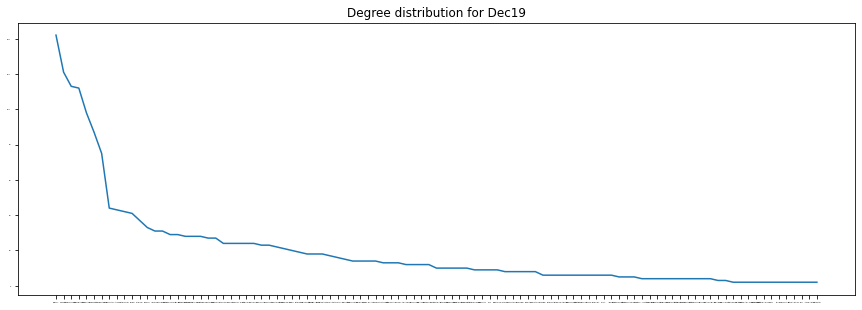

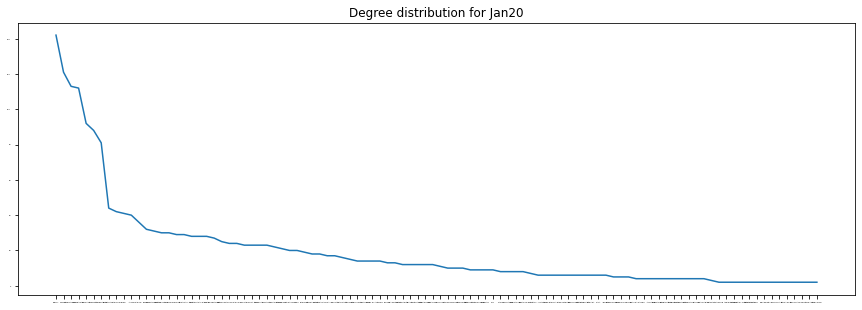

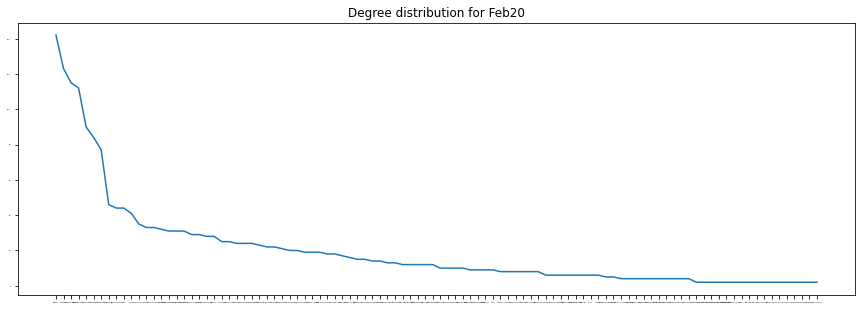

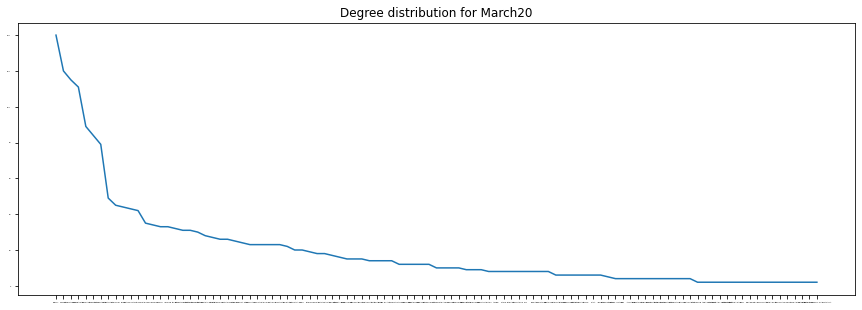

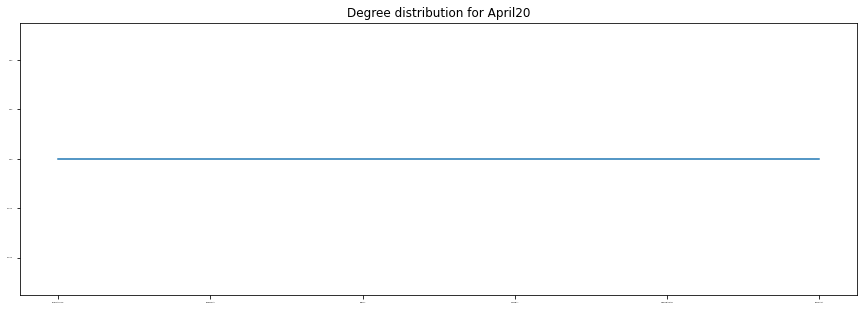

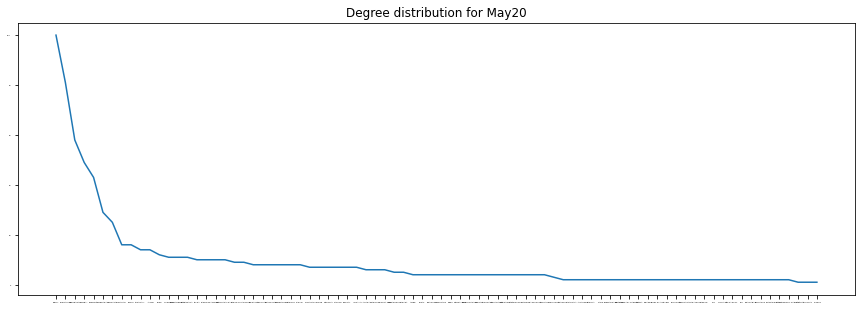

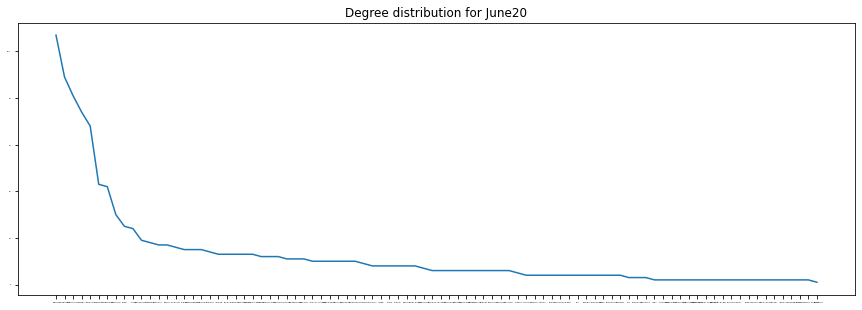

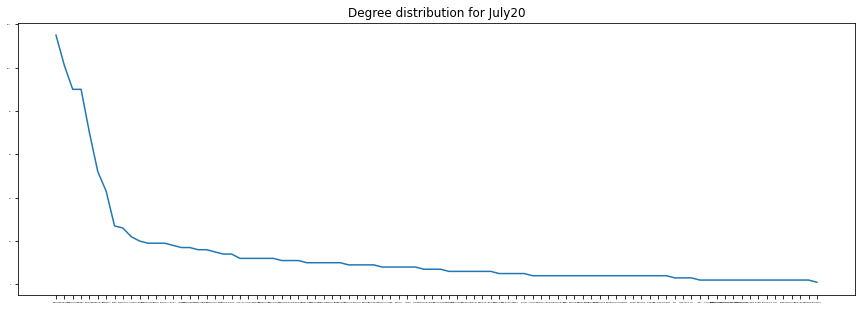

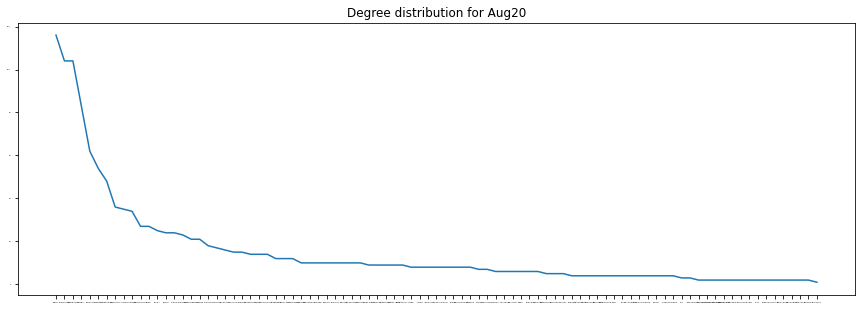

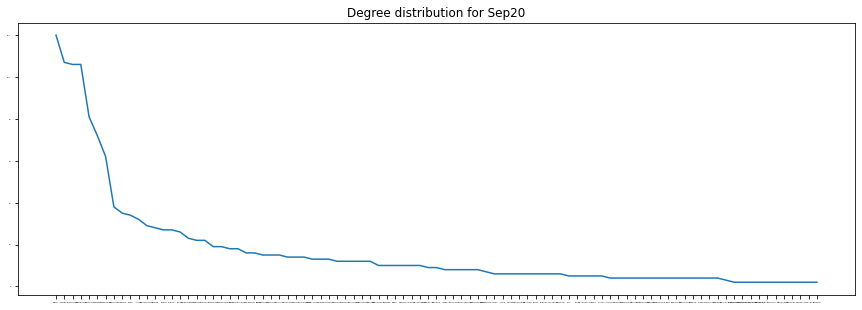

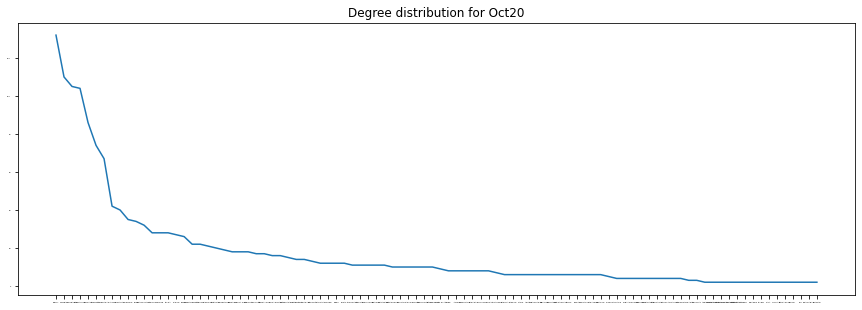

In [11]:
for i in range(len(graphs)):
    print(lbls1[i])
    G = graphs[i]
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')

    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

    print("Top 10 nodes")
    for z in range(len(sorted_degree[:10])):
        print(sorted_degree[z][0] + " -> " + str(sorted_degree[z][1]))
    
    plt.figure(figsize = (15, 5))
    plt.plot([x[0] for x in sorted_degree], [y[1] for y in sorted_degree])
    plt.title("Degree distribution for " + lbls1[i])
    plt.tick_params(axis="both", which="major", labelsize=2)
    plt.savefig('Output_Files/matplotlib/Degree ' + lbls1[i])

    print("\n")
    
    
    # TODO: fix label resolution
    
    
    